In [55]:
# Import numerical resources
import numpy as np
import random as rn

# Import graphics resources
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

%matplotlib notebook

In [56]:
x = np.linspace(0,1.0,9); print x
dx = x[1]-x[0]; print dx

[ 0.     0.125  0.25   0.375  0.5    0.625  0.75   0.875  1.   ]


In [58]:
D = 1.0

In [59]:
dt = dx**2/2/D / 10; print dt
nt = 20 # Number of time steps
t = dt*nt; print t

0.00078125
0.015625


In [60]:
C = (dt * D) / (dx**2); print C # For constants in "propagate" function 

0.05


In [61]:
# Starting f(t,x) as 2-D array of random numbers; pseudo: f[time][x]; n = 0 row stores initial field

f = np.array([[rn.random() for i in range(len(x))] for j in range(int(t/dt)+1)]); print f; # Adding a time row to include intial field

[[ 0.08337451  0.96412227  0.34537368  0.63169501  0.17042071  0.06735411
   0.00901184  0.34882626  0.17503742]
 [ 0.62486378  0.01826622  0.47613945  0.38893716  0.1073588   0.77630755
   0.41834798  0.65862606  0.61562014]
 [ 0.30874747  0.84654137  0.31700706  0.60713163  0.60012691  0.01358175
   0.29101623  0.1020434   0.66326595]
 [ 0.579425    0.46921208  0.6348125   0.94089999  0.08357346  0.83307166
   0.02900079  0.52196631  0.03356568]
 [ 0.55194131  0.81203405  0.69617052  0.52826259  0.40040748  0.34722894
   0.24050223  0.10931059  0.21678029]
 [ 0.48339326  0.09892381  0.44298112  0.64251415  0.06044665  0.72569998
   0.08439196  0.20936515  0.56812563]
 [ 0.15639691  0.81578738  0.52781252  0.44867879  0.66381069  0.19592232
   0.81535774  0.66255088  0.35393894]
 [ 0.56201948  0.02492567  0.09331843  0.41144941  0.8162368   0.22907368
   0.18105616  0.24583774  0.19081404]
 [ 0.00385515  0.66229131  0.36175254  0.02151237  0.80845291  0.51405617
   0.88930467  0.87900

In [62]:
# Function that iterates diffusion values through number of time steps
def propagate(f, nt, dt):
    # nt = len(f) - 1 # not including initial field in number of time steps
    # print nt
    t_tot = [0.0]
    t = 0.0
    for n in range(0, nt) :
        t += dt
        t_tot.append(t)
        for k in range(0, len(x)):
            f_pre = f[n][k] 
            if k == 0:
                f[n+1][k] = C * ( f[n][len(x)-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hi'

            elif k == (len(x) - 1):
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][0] ) + f_pre
                # print'hello'
            else:
                f[n+1][k] = C * ( f[n][k-1] - 2*f_pre + f[n][k+1] ) + f_pre
                # print 'hey'
                
    return f, t_tot

In [63]:
f, t_tot = propagate(f,nt,dt)
xgrid, tgrid = np.meshgrid(x,t_tot)

%whos

Variable    Type             Data/Info
--------------------------------------
Axes3D      type             <class 'mpl_toolkits.mplot3d.axes3d.Axes3D'>
C           float64          0.05
D           float            1.0
ax          Axes3DSubplot    Axes(0.125,0.1;0.775x0.8)
dt          float64          0.00078125
dx          float64          0.125
f           ndarray          21x9: 189 elems, type `float64`, 1512 bytes
fig         Figure           Figure(640x480)
i           int              8
j           int              20
np          module           <module 'numpy' from '//a<...>ages/numpy/__init__.pyc'>
nt          int              20
plt         module           <module 'matplotlib.pyplo<...>s/matplotlib/pyplot.pyc'>
propagate   function         <function propagate at 0x11f50c848>
rn          module           <module 'random' from '//<...>ib/python2.7/random.pyc'>
t           float64          0.015625
t_tot       list             n=21
tgrid       ndarray          21x9: 189 elems, 

<IPython.core.display.Javascript object>


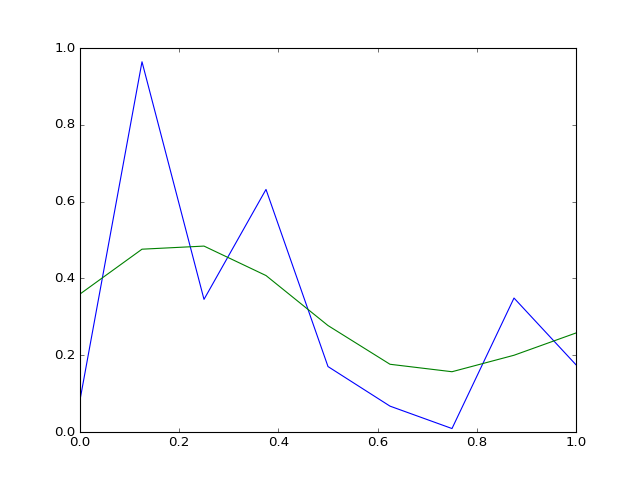

In [64]:
# This graphs first and last
plt.figure()
plt.plot(x,f[0])
plt.plot(x,f[-1])

<IPython.core.display.Javascript object>


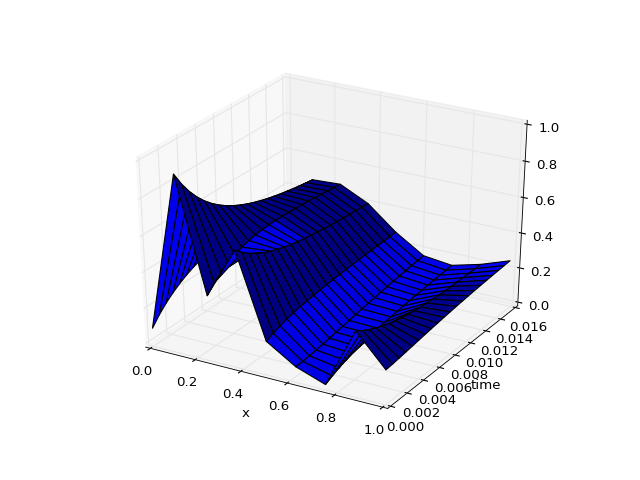

In [65]:
# This plots the solution as a function of time and space
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(xgrid, tgrid, f, rstride=1,cstride=1)
ax.set_xlabel('x')
ax.set_ylabel('time')